In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import afterglowpy as grb

In [2]:
def loadDataFromFile(filename):
    """
    Load GRB afterglow data from a .txt file.
    
    Arguments
    
        filename: the name (and path) to the data file.
        
    Returns
        
        t: array
            observed times in seconds
        nu: array
            observed frequency in Hz
        Fnu: array
            observed flux in mJy
        Ferr: array
            uncertainty in observed flux in mJy
    """
    
    
    t_all, nu_all, Fnu_all, Ferr_all, ul_all = np.loadtxt(filename, usecols=[0,1,2,3,4], unpack=True)
    
    detections = (ul_all == 0.0)
    t_det = t_all[detections]
    nu_det = nu_all[detections]
    Fnu_det = Fnu_all[detections]
    Ferr_det = Ferr_all[detections]
    
    return t_det, nu_det, Fnu_det, Ferr_det

In [3]:
t_data, nu_data, Fnu_data, Ferr_data = loadDataFromFile("160509A_data.txt")

What do I want this code to do?

*Make a function that splits three kinds of wavelengths
    bonus points - make a single function that does all three
*Make a model for each type of wavelength (??) setting a constant or... whatever
*Plot all of them out on the same graph
*Here goes nothing, sweet baby Jesus!

Section 1: Slicing functions and separating the data

In [4]:
def isoRSignals(t_data, nu_data, Fnu_data, Ferr_data):
    tR_data = []
    nuR_data = []
    FnuR_data = []
    FerrR_data = []
    for i,nu in enumerate(nu_data): 
        if nu>30 and nu<10**11:
            tR_data.append(t_data[i])
            nuR_data.append(nu_data[i])
            FnuR_data.append(Fnu_data[i])
            FerrR_data.append(Ferr_data[i])
    return tR_data, nuR_data, FnuR_data, FerrR_data

tR_data, nuR_data, FnuR_data, FerrR_data = isoRSignals(t_data, nu_data, Fnu_data, Ferr_data)

In [5]:
def isoOSignals(t_data, nu_data, Fnu_data, Ferr_data):
    tO_data = []
    nuO_data = []
    FnuO_data = []
    FerrO_data = []
    for i,nu in enumerate(nu_data): 
        if nu>10**13 and nu<10**15:
            tO_data.append(t_data[i])
            nuO_data.append(nu_data[i])
            FnuO_data.append(Fnu_data[i])
            FerrO_data.append(Ferr_data[i])
    return tO_data, nuO_data, FnuO_data, FerrO_data

tO_data, nuO_data, FnuO_data, FerrO_data = isoOSignals(t_data, nu_data, Fnu_data, Ferr_data)

In [6]:
def isoXSignals(t_data, nu_data, Fnu_data, Ferr_data):
    tX_data = []
    nuX_data = []
    FnuX_data = []
    FerrX_data = []
    for i,nu in enumerate(nu_data): 
        if nu>10**16 and nu<10**20:
            tX_data.append(t_data[i])
            nuX_data.append(nu_data[i])
            FnuX_data.append(Fnu_data[i])
            FerrX_data.append(Ferr_data[i])
    return tX_data, nuX_data, FnuX_data, FerrX_data

tX_data, nuX_data, FnuX_data, FerrX_data = isoXSignals(t_data, nu_data, Fnu_data, Ferr_data)

In [7]:
def isoSignal(t_data, nu_data, Fnu_data, Ferr_data):
    tR_data, nuR_data, FnuR_data, FerrR_data = isoRSignals(t_data, nu_data, Fnu_data, Ferr_data)
    tO_data, nuO_data, FnuO_data, FerrO_data = isoOSignals(t_data, nu_data, Fnu_data, Ferr_data)
    tX_data, nuX_data, FnuX_data, FerrX_data = isoXSignals(t_data, nu_data, Fnu_data, Ferr_data)
    return tR_data, nuR_data, FnuR_data, FerrR_data, tO_data, nuO_data, FnuO_data, FerrO_data,tX_data, nuX_data, FnuX_data, FerrX_data

In [8]:
tR_data, nuR_data, FnuR_data, FerrR_data, tO_data, nuO_data, FnuO_data, FerrO_data,tX_data, nuX_data, FnuX_data, FerrX_data = isoSignal(t_data, nu_data, Fnu_data, Ferr_data)

Section 2: Model values

In [9]:
Z = {'jetType': grb.jet.TopHat, #type of jet structure
   'specType':0,       #type of spectrum
   'thetaObs':0,       #observer angle(radians)
   'E0': 1.0e53,       #isotropic energy (erg)
   'thetaCore': 0.1,   #jet opening angle (radians)
   'n0': 1.0,          #ambient ISM density (cm^3{-3})
   'p': 2.2,           #electron energy slope (no units)
   'epsilon_e': 0.1,   #fraction of energy in accelerated electrons (no units)
   'epsilon_B': 0.1,   #fraction of energy in magnetic field (no units)
   'ksiN': 1.0,        #luminosity distancde (cm)
   'dL': 1.0e28,       #redshift (no units)
   'z': 0.5
  }

In [10]:
tR_model = np.array([1.0e3, 1.0e4, 1.0e5, 1.0e6])
nuR_model = np.array([1.0e6,1.0e6,1.0e6,1.0e6])

FnuR_model = grb.fluxDensity(tR_model, nuR_model, **Z)

In [11]:
tO_model = np.array([1.0e3, 1.0e4, 1.0e5, 1.0e6])
nuO_model = np.array([1.0e14,1.0e14,1.0e14,1.0e14])

FnuO_model = grb.fluxDensity(tO_model, nuO_model, **Z)

In [12]:
tX_model = np.array([1.0e3, 1.0e4, 1.0e5, 1.0e6])
nuX_model = np.array([1.0e17,1.0e17,1.0e17,1.0e17])

FnuX_model = grb.fluxDensity(tX_model, nuX_model, **Z)

Section 3: Plotting the data

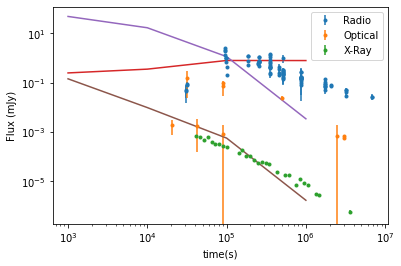

In [13]:
plt.errorbar(tR_data, FnuR_data, FerrR_data, ls = "", marker = ".", label = "Radio")
plt.errorbar(tO_data, FnuO_data, FerrO_data, ls = "", marker = ".", label = "Optical")
plt.errorbar(tX_data, FnuX_data, FerrX_data, ls = "", marker = ".", label = "X-Ray")
plt.plot(tR_model, FnuR_model)
plt.plot(tO_model, FnuO_model)
plt.plot(tX_model, FnuX_model)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('time(s)')
plt.ylabel('Flux (mJy)')
plt.legend()
plt.show()